In [2]:
import pandas as pd
df_no_outliers = pd.read_csv("C:/Users/Zainab/Downloads/swimming_data_no_outliers.csv")


In [3]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler




# Time_seconds and Distance for clustering
X_cluster = df_no_outliers[['Time_seconds', 'Distance']].copy()

# Standardize the features
scaler_cluster = StandardScaler()
X_cluster_scaled = scaler_cluster.fit_transform(X_cluster)

# Apply K-Means clustering

kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_cluster_scaled)

# Add the cluster labels to the DataFrame
df_no_outliers['Cluster'] = clusters

# Display the distribution of clusters
print("Cluster Distribution:")
print(df_no_outliers['Cluster'].value_counts())

# Retrieve the names of swimmers in each cluster
cluster_names = df_no_outliers.groupby('Cluster')['Name'].apply(list)
print("\nSwimmers by Cluster:")
print(cluster_names)


import os
downloads_path = os.path.join(os.path.expanduser("~"), "Downloads", "clustered_swimming_data.csv")
df_no_outliers.to_csv(downloads_path, index=False)
print("\nClustered data saved to:", downloads_path)


Cluster Distribution:
0    1869
1     359
2      88
Name: Cluster, dtype: int64

Swimmers by Cluster:
Cluster
0    [David Theile, John Monckton, Bob Bennett, Tom...
1    [Ken Huszagh, Duke Kahanamoku, Perry McGillivr...
2    [Henry Taylor, George Hodgson, Arne Borg, Arne...
Name: Name, dtype: object

Clustered data saved to: C:\Users\Zainab\Downloads\clustered_swimming_data.csv


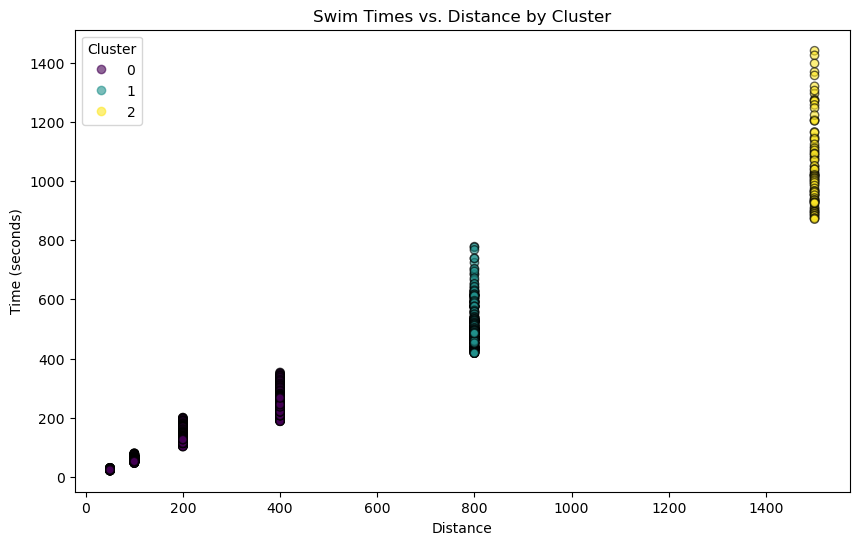

Cluster Centroids (Time_seconds, Distance):
Cluster 0: Time = 168.34 seconds, Distance = 265.09
Cluster 1: Time = 511.73 seconds, Distance = 800.00
Cluster 2: Time = 1052.62 seconds, Distance = 1500.00

Descriptive Statistics for Time_seconds by Cluster:
          count         mean         std     min      25%     50%     75%  \
Cluster                                                                     
0        1869.0   168.341520   86.264292   20.91   79.600   163.2   242.5   
1         359.0   511.727103   70.729102  418.60  463.300   496.6   539.5   
2          88.0  1052.615909  144.445481  871.00  937.475  1015.5  1127.7   

            max  
Cluster          
0         353.2  
1         778.2  
2        1440.2  


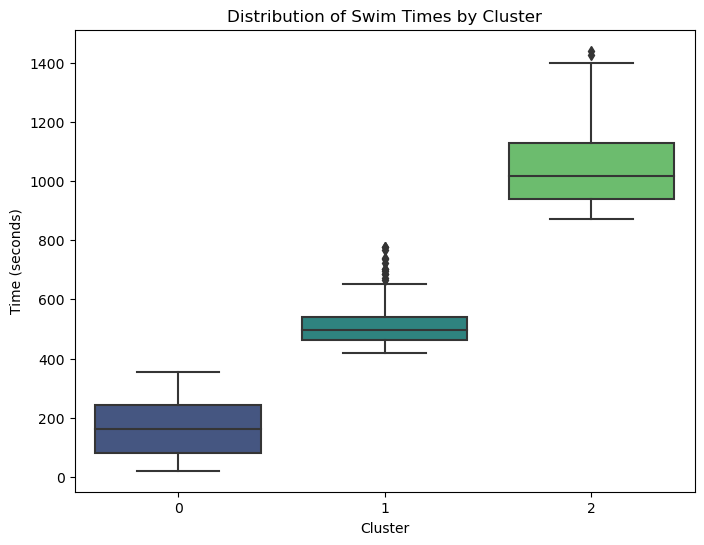

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


# 1. Scatter Plot: Swim Time vs. Distance by Cluster

plt.figure(figsize=(10, 6))
scatter = plt.scatter(df_no_outliers['Distance'], df_no_outliers['Time_seconds'],
                      c=df_no_outliers['Cluster'], cmap='viridis', alpha=0.6, edgecolors='k')
plt.xlabel("Distance")
plt.ylabel("Time (seconds)")
plt.title("Swim Times vs. Distance by Cluster")
plt.legend(*scatter.legend_elements(), title="Cluster")
plt.show()




from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Select the features used for clustering
X_cluster = df_no_outliers[['Time_seconds', 'Distance']]
scaler_cluster = StandardScaler()
X_cluster_scaled = scaler_cluster.fit_transform(X_cluster)

# Re-run KMeans clustering on these features (3 clusters)
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_cluster_scaled)

df_no_outliers['Cluster'] = clusters


centroids_scaled = kmeans.cluster_centers_
centroids = scaler_cluster.inverse_transform(centroids_scaled)
print("Cluster Centroids (Time_seconds, Distance):")
for i, centroid in enumerate(centroids):
    print(f"Cluster {i}: Time = {centroid[0]:.2f} seconds, Distance = {centroid[1]:.2f}")


# Descriptive Statistics by Cluster

cluster_stats = df_no_outliers.groupby('Cluster')['Time_seconds'].describe()
print("\nDescriptive Statistics for Time_seconds by Cluster:")
print(cluster_stats)


 # Box Plot: Distribution of Swim Times by Cluster

plt.figure(figsize=(8, 6))
sns.boxplot(x='Cluster', y='Time_seconds', data=df_no_outliers, palette='viridis')
plt.title("Distribution of Swim Times by Cluster")
plt.xlabel("Cluster")
plt.ylabel("Time (seconds)")
plt.show()


In [5]:
# Create a new column 'pace' in the outlier-removed dataset
# pace = Time_seconds / Distance
df_no_outliers['pace'] = df_no_outliers['Time_seconds'] / df_no_outliers['Distance']


In [6]:

def get_stroke(event_str):
    #  approach if last word is stroke name
    return event_str.split()[-1]  # e.g. "freestyle", "butterfly", etc.

df_no_outliers['Stroke'] = df_no_outliers['Event'].apply(get_stroke)


Cluster Distribution (based on pace + stroke):
2    869
0    783
1    664
Name: Cluster_pace, dtype: int64

Swimmers by Pace-Based Cluster:
Cluster_pace
0    [Zoltán Kiss, Gyula Dienes, Ãrpád Lengyel, Fe...
1    [Cathy Ferguson, Ann Farlie, Elaine Tanner, El...
2    [David Theile, John Monckton, Bob Bennett, Tom...
Name: Name, dtype: object


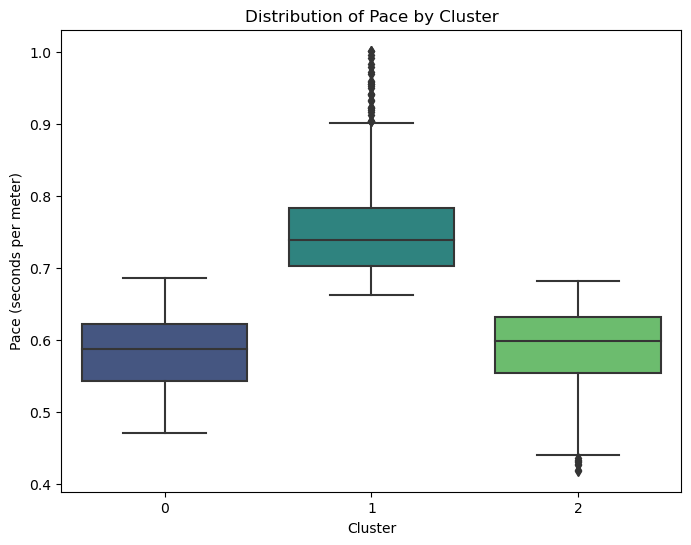

In [7]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns


df_no_outliers['pace'] = df_no_outliers['Time_seconds'] / df_no_outliers['Distance']
df_no_outliers['Stroke'] = df_no_outliers['Event'].apply(lambda x: x.split()[-1])

# Define features for clustering
numeric_features = ['pace']
categorical_features = ['Stroke'] 

# Build the ColumnTransformer for numeric and categorical
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor_clustering = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# Create a pipeline for K-Means
pipeline_kmeans = Pipeline(steps=[
    ('preprocessor', preprocessor_clustering),
    ('kmeans', KMeans(n_clusters=3, random_state=42))
])

# Fit the pipeline
pipeline_kmeans.fit(df_no_outliers[numeric_features + categorical_features])

# Predict cluster labels
df_no_outliers['Cluster_pace'] = pipeline_kmeans.predict(df_no_outliers[numeric_features + categorical_features])

# Inspect the cluster distribution
print("Cluster Distribution (based on pace + stroke):")
print(df_no_outliers['Cluster_pace'].value_counts())

# Analyze each cluster
grouped_names = df_no_outliers.groupby('Cluster_pace')['Name'].apply(list)
print("\nSwimmers by Pace-Based Cluster:")
print(grouped_names)


plt.figure(figsize=(8, 6))
sns.boxplot(x='Cluster_pace', y='pace', data=df_no_outliers, palette='viridis')
plt.title("Distribution of Pace by Cluster")
plt.xlabel("Cluster")
plt.ylabel("Pace (seconds per meter)")
plt.show()


In [8]:
import os


downloads_path = os.path.join(os.path.expanduser("~"), "Downloads", "clustered_pace_swimming_data.csv")


df_no_outliers.to_csv(downloads_path, index=False)

print("File saved to:", downloads_path)


File saved to: C:\Users\Zainab\Downloads\clustered_pace_swimming_data.csv


In [9]:
fastest_cluster = df_no_outliers[df_no_outliers['Cluster_pace'] == 2]
print("Number of swimmers in fastest cluster:", len(fastest_cluster))


Number of swimmers in fastest cluster: 869


In [10]:
# Sort swimmers in Cluster 2 by ranking
fastest_cluster_sorted = fastest_cluster.sort_values(by='Ranking_numeric', ascending=True)
print("Fastest Cluster (Cluster 2) sorted by Ranking:")
print(fastest_cluster_sorted[['Name', 'Ranking_numeric', 'Time_seconds', 'Distance', 'pace']].head(20))


Fastest Cluster (Cluster 2) sorted by Ranking:
                       Name  Ranking_numeric  Time_seconds  Distance    pace
0              David Theile              1.0         62.20       100  0.6220
2139         Inge de Bruijn              1.0         26.50        50  0.5300
2132          Geoff Huegill              1.0         23.40        50  0.4680
2088      Lenny Krayzelburg              1.0         25.00        50  0.5000
2178         Kornelia Ender              1.0         27.00        50  0.5400
2094          Sandra Völker              1.0         29.00        50  0.5800
2112       Anthony Robinson              1.0         27.50        50  0.5500
2122         Penelope Heyns              1.0         30.80        50  0.6160
245           Zoltán Halmay              1.0         65.80       100  0.6580
169           György Tumpek              1.0         63.40       100  0.6340
2149          Jonty Skinner              1.0         23.86        50  0.4772
2150             Joe Bottom  

In [11]:
star_swimmers = ['Michael Phelps', 'Katie Ledecky', 'Mark Spitz', 'Caeleb Dressel']
star_swimmer_entries = fastest_cluster[fastest_cluster['Name'].isin(star_swimmers)]
print("Star swimmers found in fastest cluster:")
print(star_swimmer_entries[['Name', 'Ranking_numeric', 'Time_seconds', 'Distance', 'pace']])


Star swimmers found in fastest cluster:
               Name  Ranking_numeric  Time_seconds  Distance      pace
180      Mark Spitz             12.0          56.3       100  0.563000
182      Mark Spitz             14.0          55.7       100  0.557000
183      Mark Spitz             15.0          55.6       100  0.556000
184      Mark Spitz             17.0          54.7       100  0.547000
185      Mark Spitz             18.0          54.6       100  0.546000
...             ...              ...           ...       ...       ...
2311  Katie Ledecky             53.0         493.9       800  0.617375
2312  Katie Ledecky             54.0         491.0       800  0.613750
2313  Katie Ledecky             55.0         487.4       800  0.609250
2314  Katie Ledecky             56.0         486.7       800  0.608375
2315  Katie Ledecky             57.0         484.8       800  0.606000

[64 rows x 5 columns]


In [12]:
# Filter the DataFrame for Cluster 0 (assumed mid-range pace)
cluster_0 = df_no_outliers[df_no_outliers['Cluster_pace'] == 0]
print("Cluster 0 Summary:")
print(cluster_0[['Name', 'Ranking_numeric', 'Time_seconds', 'Distance', 'pace']].sort_values(by='Ranking_numeric', ascending=False).head(20))
print("\nCluster 0 Descriptive Statistics (Ranking and Pace):")
print(cluster_0[['Ranking_numeric', 'pace']].describe())

# Filter the DataFrame for Cluster 1 (assumed slower pace)
cluster_1 = df_no_outliers[df_no_outliers['Cluster_pace'] == 1]
print("\nCluster 1 Summary:")
print(cluster_1[['Name', 'Ranking_numeric', 'Time_seconds', 'Distance', 'pace']].sort_values(by='Ranking_numeric', ascending=False).head(20))
print("\nCluster 1 Descriptive Statistics (Ranking and Pace):")
print(cluster_1[['Ranking_numeric', 'pace']].describe())


Cluster 0 Summary:
                  Name  Ranking_numeric  Time_seconds  Distance      pace
1842       Ryan Lochte             54.0         418.6       800  0.523250
1841     David Walters             54.0         418.6       800  0.523250
1840      Ricky Berens             54.0         418.6       800  0.523250
1839    Michael Phelps             54.0         418.6       800  0.523250
1838  Peter Vanderkaay             53.0         418.6       800  0.523250
1836       Ryan Lochte             53.0         418.6       800  0.523250
1835    Michael Phelps             53.0         418.6       800  0.523250
1837      Ricky Berens             53.0         418.6       800  0.523250
1831    Michael Phelps             52.0         423.2       800  0.529000
1833      Klete Keller             52.0         423.2       800  0.529000
1834  Peter Vanderkaay             52.0         423.2       800  0.529000
1832       Ryan Lochte             52.0         423.2       800  0.529000
1828      Michael K

Cluster Centroids (pace in sec/m):
Cluster 0: Average Pace = 0.785 sec/m
Cluster 1: Average Pace = 0.547 sec/m
Cluster 2: Average Pace = 0.648 sec/m


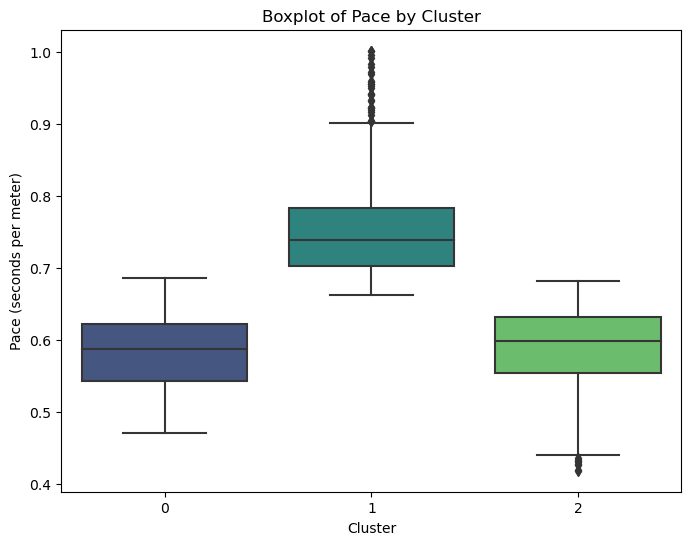

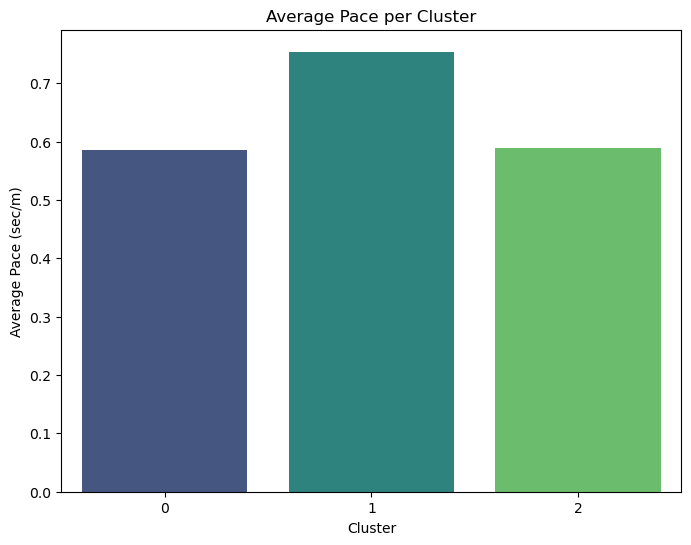

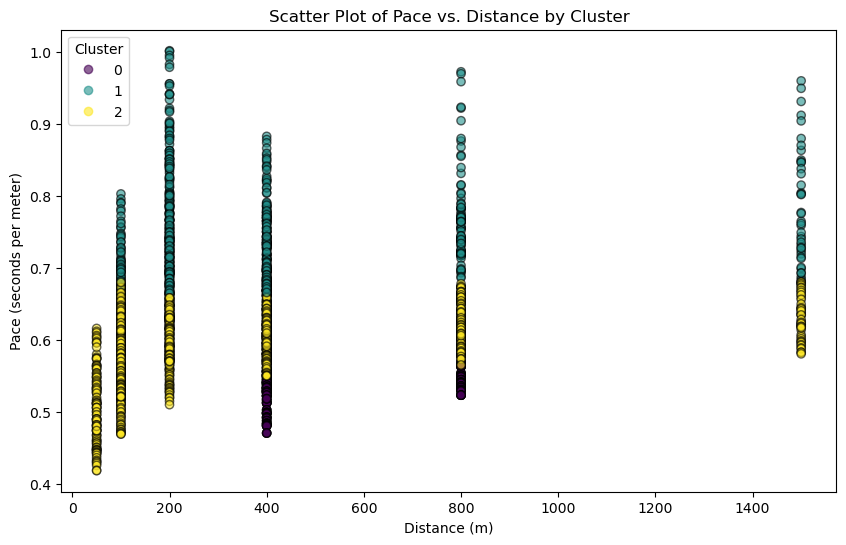

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


df_no_outliers['pace'] = df_no_outliers['Time_seconds'] / df_no_outliers['Distance']
df_no_outliers['Stroke'] = df_no_outliers['Event'].apply(lambda x: x.split()[-1])


# Select the features for clustering. will use only 'pace' for centroid analysis.
X_cluster = df_no_outliers[['pace']].copy()

# Standardize the pace feature
scaler_cluster = StandardScaler()
X_cluster_scaled = scaler_cluster.fit_transform(X_cluster)

# Use K-Means with the same number of clusters (3) as before
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_cluster_scaled)

# Inverse transform cluster centroids back to original pace scale
centroids_scaled = kmeans.cluster_centers_
centroids = scaler_cluster.inverse_transform(centroids_scaled)

print("Cluster Centroids (pace in sec/m):")
for i, centroid in enumerate(centroids):
    print(f"Cluster {i}: Average Pace = {centroid[0]:.3f} sec/m")


#  Boxplot of Pace by Cluster

plt.figure(figsize=(8, 6))
sns.boxplot(x='Cluster_pace', y='pace', data=df_no_outliers, palette='viridis')
plt.title("Boxplot of Pace by Cluster")
plt.xlabel("Cluster")
plt.ylabel("Pace (seconds per meter)")
plt.show()

# Bar Plot of Average Pace per Cluster

cluster_means = df_no_outliers.groupby('Cluster_pace')['pace'].mean().reset_index()
plt.figure(figsize=(8, 6))
sns.barplot(x='Cluster_pace', y='pace', data=cluster_means, palette='viridis')
plt.title("Average Pace per Cluster")
plt.xlabel("Cluster")
plt.ylabel("Average Pace (sec/m)")
plt.show()


# Scatter Plot of Pace vs. Distance colored by Cluster

plt.figure(figsize=(10, 6))
scatter = plt.scatter(df_no_outliers['Distance'], df_no_outliers['pace'], 
                      c=df_no_outliers['Cluster_pace'], cmap='viridis', alpha=0.6, edgecolors='k')
plt.xlabel("Distance (m)")
plt.ylabel("Pace (seconds per meter)")
plt.title("Scatter Plot of Pace vs. Distance by Cluster")
plt.legend(*scatter.legend_elements(), title="Cluster")
plt.show()
